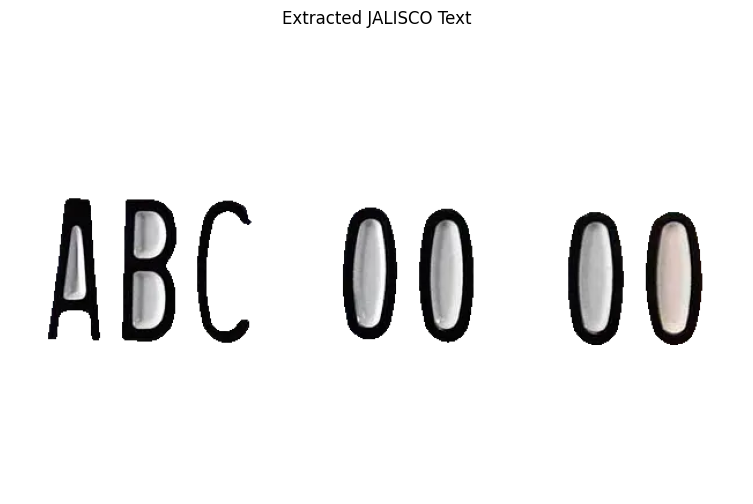

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('a.jpg')

# Blur before hsv
blurred_image = cv2.GaussianBlur(image, (11, 11), 0)

# Convert to HSV for better color segmentation
hsv = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)

# Define range for black color only
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])

# Create mask for black colors
black_mask = cv2.inRange(hsv, lower_black, upper_black)

# Apply morphological operations to clean up the mask
kernel = np.ones((3,3), np.uint8)
cleaned = cv2.morphologyEx(black_mask, cv2.MORPH_CLOSE, kernel)

# Filter by contour area to keep only the large JALISCO letters
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result_mask = np.zeros_like(cleaned)

min_area = 1000  # Adjust this threshold based on the size of the letters
for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        cv2.drawContours(result_mask, [contour], -1, 255, -1)

# Create final result
result = cv2.bitwise_and(image, image, mask=result_mask)

# Convert background to white where mask is 0
white_background = np.ones_like(image) * 255
result = np.where(result_mask[:,:,np.newaxis] == 0, white_background, result)

# Display and save the result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Extracted JALISCO Text')
plt.axis('off')
plt.show()

cv2.imwrite('extractedPlate.jpg', result)

In [3]:
# Perform OCR on the processed image
import cv2
import matplotlib.pyplot as plt
import pytesseract
import os

os.environ['TESSDATA_PREFIX'] = '/opt/homebrew/Cellar/tesseract/5.5.0_1/share/tessdata'

result = cv2.imread('extractedPlate.jpg')

text = pytesseract.image_to_string(result, lang='spa')  # Use 'spa' for Spanish text
print("Extracted Text:")
print(text)

Extracted Text:
ABC 00 00

